In [1]:
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))

from src.data_loader import BraTSLoader

DATA_DIR = '../data/01_raw/train'

In [2]:
loader = BraTSLoader(DATA_DIR)
patient_ids = loader.get_patient_ids()

sample_id = 'BraTS20_Training_001'
volume, mask = loader.load_patient_data(sample_id)

print(f"Wymiary obrazu (H, W, D, C): {volume.shape}")
print(f"Wymiary maski (H, W, D):    {mask.shape}")

Wymiary obrazu (H, W, D, C): (240, 240, 155, 4)
Wymiary maski (H, W, D):    (240, 240, 155)


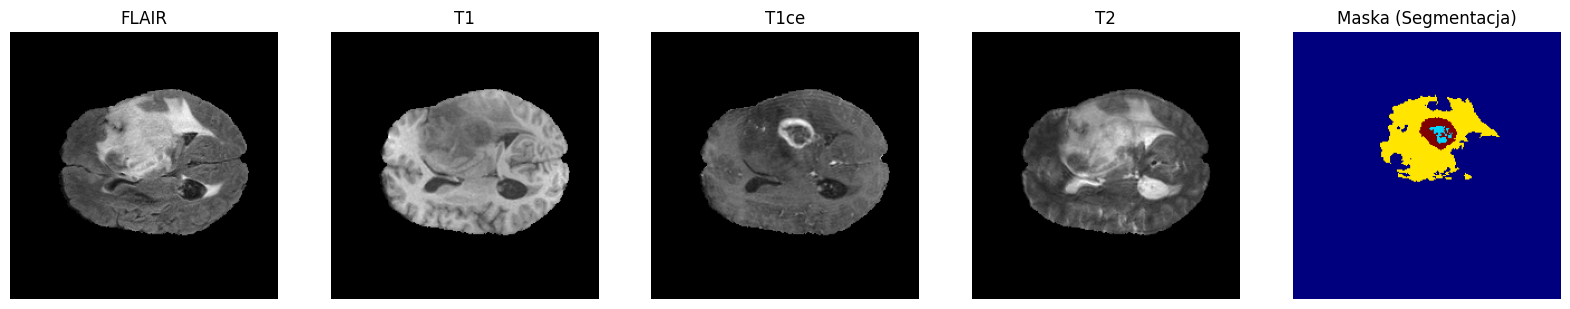

In [3]:
slice_num = 75

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
titles = ['FLAIR', 'T1', 'T1ce', 'T2', 'Maska (Segmentacja)']

for i in range(4):
    axes[i].imshow(volume[:, :, slice_num, i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

axes[4].imshow(mask[:, :, slice_num], cmap='jet', vmin=0, vmax=3)
axes[4].set_title(titles[4])
axes[4].axis('off')

plt.show()

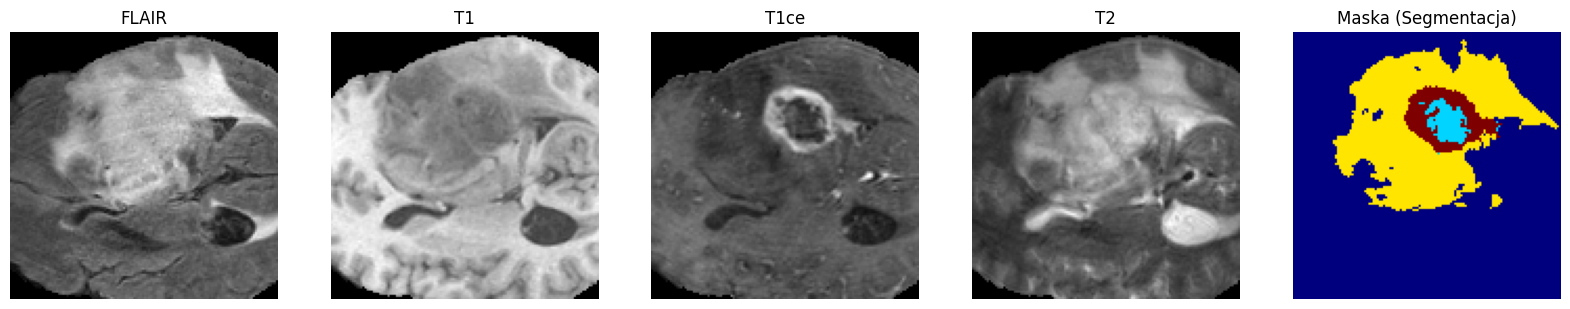

In [4]:
from src.preprocessing import preprocess_data

processed_volume, processed_mask = preprocess_data(volume, mask)

slice_num = processed_volume.shape[2] // 2

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
titles = ['FLAIR', 'T1', 'T1ce', 'T2', 'Maska (Segmentacja)']

for i in range(4):
    axes[i].imshow(processed_volume[:, :, slice_num, i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

axes[4].imshow(processed_mask[:, :, slice_num], cmap='jet', vmin=0, vmax=3)
axes[4].set_title(titles[4])
axes[4].axis('off')

plt.show()